In [1]:
import numpy as np
import matplotlib.pyplot as  plt

In [2]:
def distance(p1,p2):
  return np.sqrt(np.sum((p1-p2)**2))

In [3]:
n_ants=10
n_point=10
n_iter=10
alpha=beta=Q=1
evaporation_rate=0.5
points=np.random.rand(n_point,2)

In [4]:
pheromone=np.ones((n_point,n_point))
best_path=None
best_path_lenght=np.inf


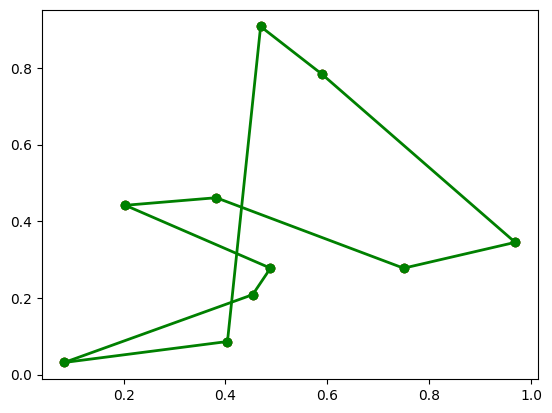

2.9588419283208234


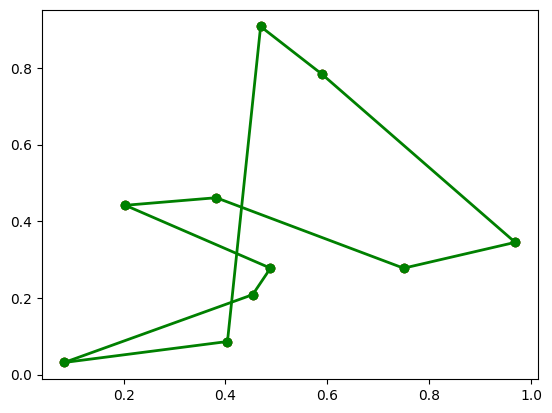

2.9588419283208234


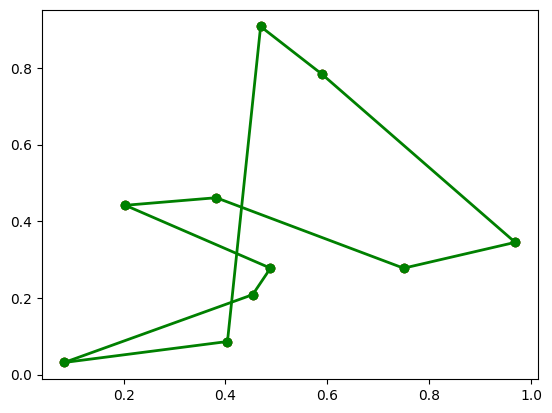

2.9588419283208234


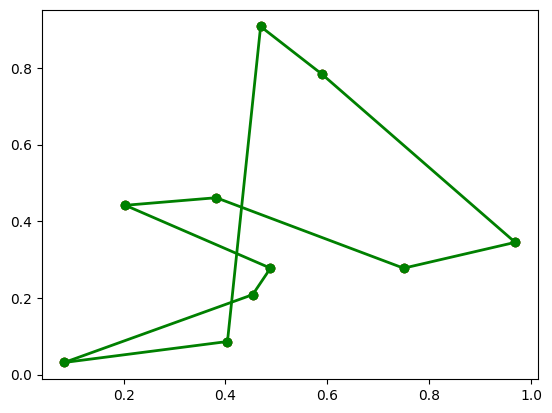

2.9588419283208234


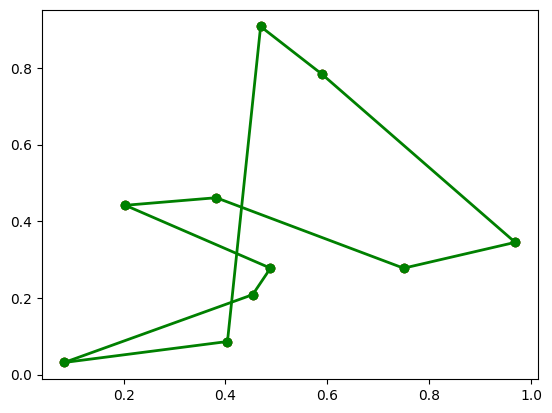

2.9588419283208234


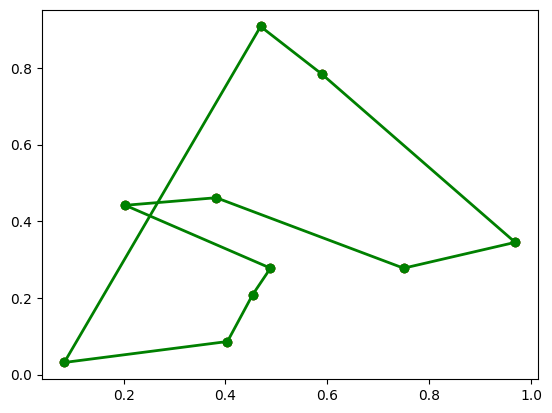

2.813834209677385


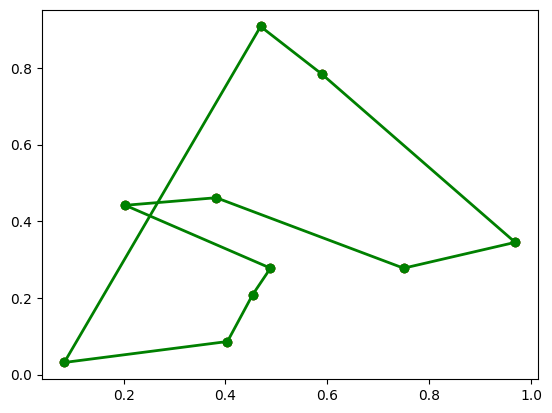

2.813834209677385


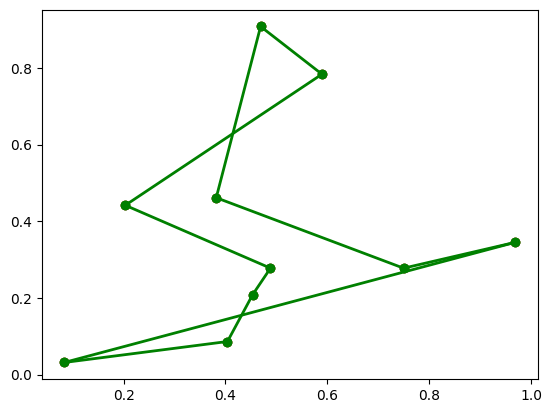

2.6475832428790347


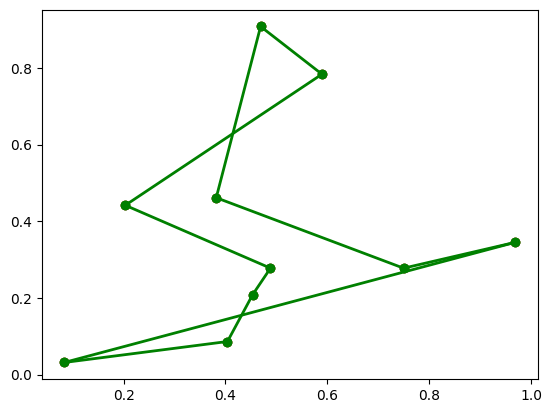

2.6475832428790347


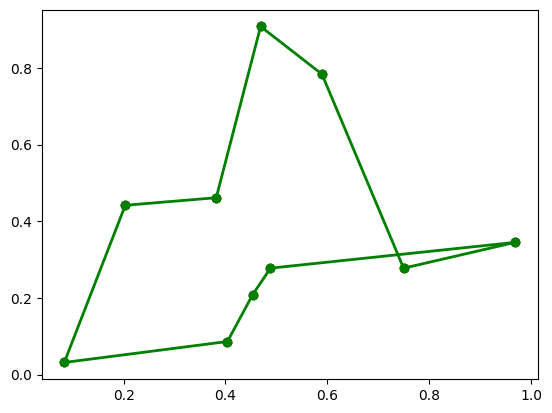

2.52922493964153


In [5]:
pheromone = np.ones((n_point, n_point))
best_path = None
best_path_length = np.inf

for iteration in range(n_iter):
    paths = []
    path_lengths = []

    for ant in range(n_ants):
        visited = [False]*n_point
        current_point = np.random.randint(n_point)
        visited[current_point] = True
        path = [current_point]
        path_length = 0

        while False in visited:
            unvisited = np.where(np.logical_not(visited))[0]
            p = np.zeros(len(unvisited))

            for i,v in enumerate(unvisited):
                p[i] = pheromone[current_point,v]**alpha / distance(points[current_point], points[v])**beta

            p /= np.sum(p)

            next_point = np.random.choice(unvisited, p=p)
            path.append(next_point)
            path_length += distance(points[current_point], points[next_point])
            visited[next_point] = True
            current_point = next_point

        paths.append(path)
        path_lengths.append(path_length)

        if path_length < best_path_length:
            best_path = path
            best_path_length = path_length

    pheromone *= evaporation_rate

    for path, path_length in zip(paths, path_lengths):
        for i in range(n_point-1):
            pheromone[path[i], path[i+1]] += Q/path_length
        pheromone[path[-1], path[0]] += Q/path_length


    plt.scatter(points[:,0], points[:,1], c='r', marker='o')
    for i in range(n_point-1):
        plt.plot([points[best_path[i],0], points[best_path[i+1],0]],
                [points[best_path[i],1], points[best_path[i+1],1]],
                c='g', linestyle='-', linewidth=2, marker='o')

    plt.plot([points[best_path[0],0], points[best_path[-1],0]],
            [points[best_path[0],1], points[best_path[-1],1]],
            c='g', linestyle='-', linewidth=2, marker='o')

    plt.show()
    print(best_path_length)
